# Digit Recognizer

Target: Take an image of a handwritten single digit, and determine what that digit is.

Source: https://www.kaggle.com/c/digit-recognizer

In [2]:
# data manipulation
import numpy as np

# high-level neural networks API - running on top of TensorFlow
import keras
from keras.datasets import mnist 
# Sequential is a linear stack of layers
from keras.models import Sequential
# Dense, Flatten - type of layers, Dropout - tool, which decrease chance of overfitting
from keras.layers import Dense, Dropout, Flatten

# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# shape of data
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
def vis_rand_dig():
    # size of pixcel
    plt.figure(figsize = (10, 10))
    # print random digit
    rand_indexes = np.random.randint(0, X_train.shape[0], 16)
    for index,im_index in enumerate(rand_indexes):
        plt.subplot(4, 4, index+1)
        plt.imshow(X_train[im_index], cmap = 'tab20c', interpolation = 'none')
        plt.title('Class %d' % y_train[im_index])
    plt.tight_layout()

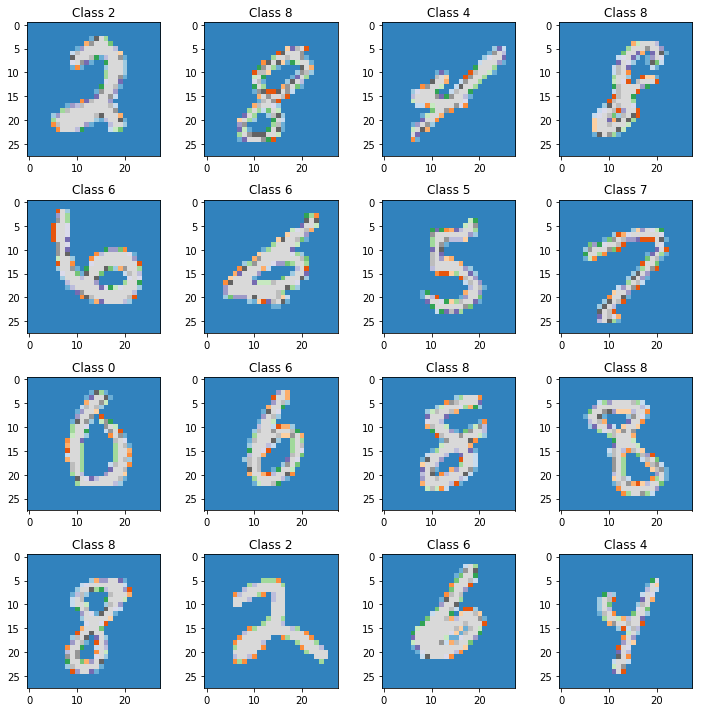

In [6]:
vis_rand_dig()

# Prepare data

To prepare data we have to tree steps:
    - transmission data to neurons (we have 28x28 image, so we have 784 neurons);
    - normalization data (normalize value of pixels from 0 to 1);
    - transmission vector to matrix (every neutron cointains probability of a digit);

In [7]:
def prep_data(X_tr, X_ts, y_tr, y_ts):
   
    if len(X_tr.shape) == 3:
        pixels = X_tr.shape[1] * X_tr.shape[2]
        print(X_tr.shape, X_ts.shape)
        X_tr = (X_tr.reshape(X_tr.shape[0], pixels).astype('float32')) / 255
        X_ts = (X_ts.reshape(X_ts.shape[0], pixels).astype('float32')) / 255
        
        print(X_tr.shape, X_ts.shape)
        
    y_tr = keras.utils.np_utils.to_categorical(y_tr)
    y_ts = keras.utils.np_utils.to_categorical(y_ts)

    classes = y_ts.shape[1]
    print(classes)
    return X_tr, y_tr, X_ts, y_ts, pixels, classes

In [8]:
X_train, y_train, X_test, y_test, in_neurons, out_neurons = prep_data(X_train, X_test, y_train, y_test)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)
10


# MLP

At first MLP will have three layer: input, hidden and output.
    - input must have 784 (28x28 size of picture);
    - the nuber of neurons in hidden layer is dependent on input layer. It is often the case, that this layer is       smaller than input layer. I will choose 512 neurons;
    - output have 10 (unique) class;

I use Keras to do this.

In [9]:
mlp = Sequential([
    Dense(512, input_dim = in_neurons, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(out_neurons, activation = 'softmax')])

mlp.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


I have three layers (first is input, which initiated in first hidden layer - Keras allows it).
We see two layers: hidden and output. Type of layers are Dense. Hidden layer has 512 output neurons. Output layer has 10 output neutrons. 
In below table we see three value: Total params (all of weight), Trainable params, which has the same result as Total params and Non-trainable params (this value will be more in Transfer Learning).

# Training

In [10]:
mlp.fit(X_train, y_train, batch_size = 1000, epochs = 25, verbose = 2, validation_data = (X_test, y_test));

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
 - 1s - loss: 0.6495 - acc: 0.8074 - val_loss: 0.2792 - val_acc: 0.9201
Epoch 2/25
 - 1s - loss: 0.2423 - acc: 0.9294 - val_loss: 0.1959 - val_acc: 0.9418
Epoch 3/25
 - 1s - loss: 0.1850 - acc: 0.9465 - val_loss: 0.1508 - val_acc: 0.9556
Epoch 4/25
 - 1s - loss: 0.1428 - acc: 0.9585 - val_loss: 0.1748 - val_acc: 0.9432
Epoch 5/25
 - 1s - loss: 0.1188 - acc: 0.9652 - val_loss: 0.1089 - val_acc: 0.9668
Epoch 6/25
 - 1s - loss: 0.0987 - acc: 0.9711 - val_loss: 0.0979 - val_acc: 0.9689
Epoch 7/25
 - 1s - loss: 0.0865 - acc: 0.9749 - val_loss: 0.0911 - val_acc: 0.9727
Epoch 8/25
 - 1s - loss: 0.0753 - acc: 0.9772 - val_loss: 0.0851 - val_acc: 0.9728
Epoch 9/25
 - 1s - loss: 0.0633 - acc: 0.9815 - val_loss: 0.0790 - val_acc: 0.9740
Epoch 10/25
 - 1s - loss: 0.0595 - acc: 0.9824 - val_loss: 0.1036 - val_acc: 0.9652
Epoch 11/25
 - 1s - loss: 0.0510 - acc: 0.9850 - val_loss: 0.0732 - val_acc: 0.9780
Epoch 12/25
 - 1s - loss: 0.0435 - 

We have 25 epoch (in one epoch we have 60 iteration -> batch_size = 1000). Metrics of train set: loss and acc. Train metrics is val_loss and val_acc.

# Testing

In [11]:
result = mlp.evaluate(X_test, y_test)
print('Loss: ', result[0])
print('Acc: ', result[1])
print('Error: %.2f%%' %  (100 - result[1]*100))

10000/10000 [==============================] - 0s 29us/step
Loss:  0.057163582714120274
Acc:  0.9824
Error: 1.76%
